In [120]:
from torchvision import models
import torch

In [121]:
[model for model in dir(models) if not model.startswith('_')]

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vgg16_bn',
 'vgg19',
 'vgg19_bn',
 'video',
 'wide_resnet101_2',
 'wide_resnet50_2']

In [122]:
resnet18_model = models.resnet18(pretrained=True)

In [123]:
from torchvision import transforms

In [124]:
preprocess = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize( mean = [0.485,0.456,0.406],
                          std = [0.229,0.224,0.225] )
])

In [125]:
from PIL import Image

In [126]:
pwd

'c:\\Users\\jainrohi\\Desktop\\temp'

In [127]:
img1 = Image.open('../cc.jpg')
img2 = Image.open('../king.jpg')
img3 = Image.open('../swim.jpg')

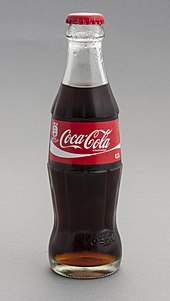

In [128]:
img1

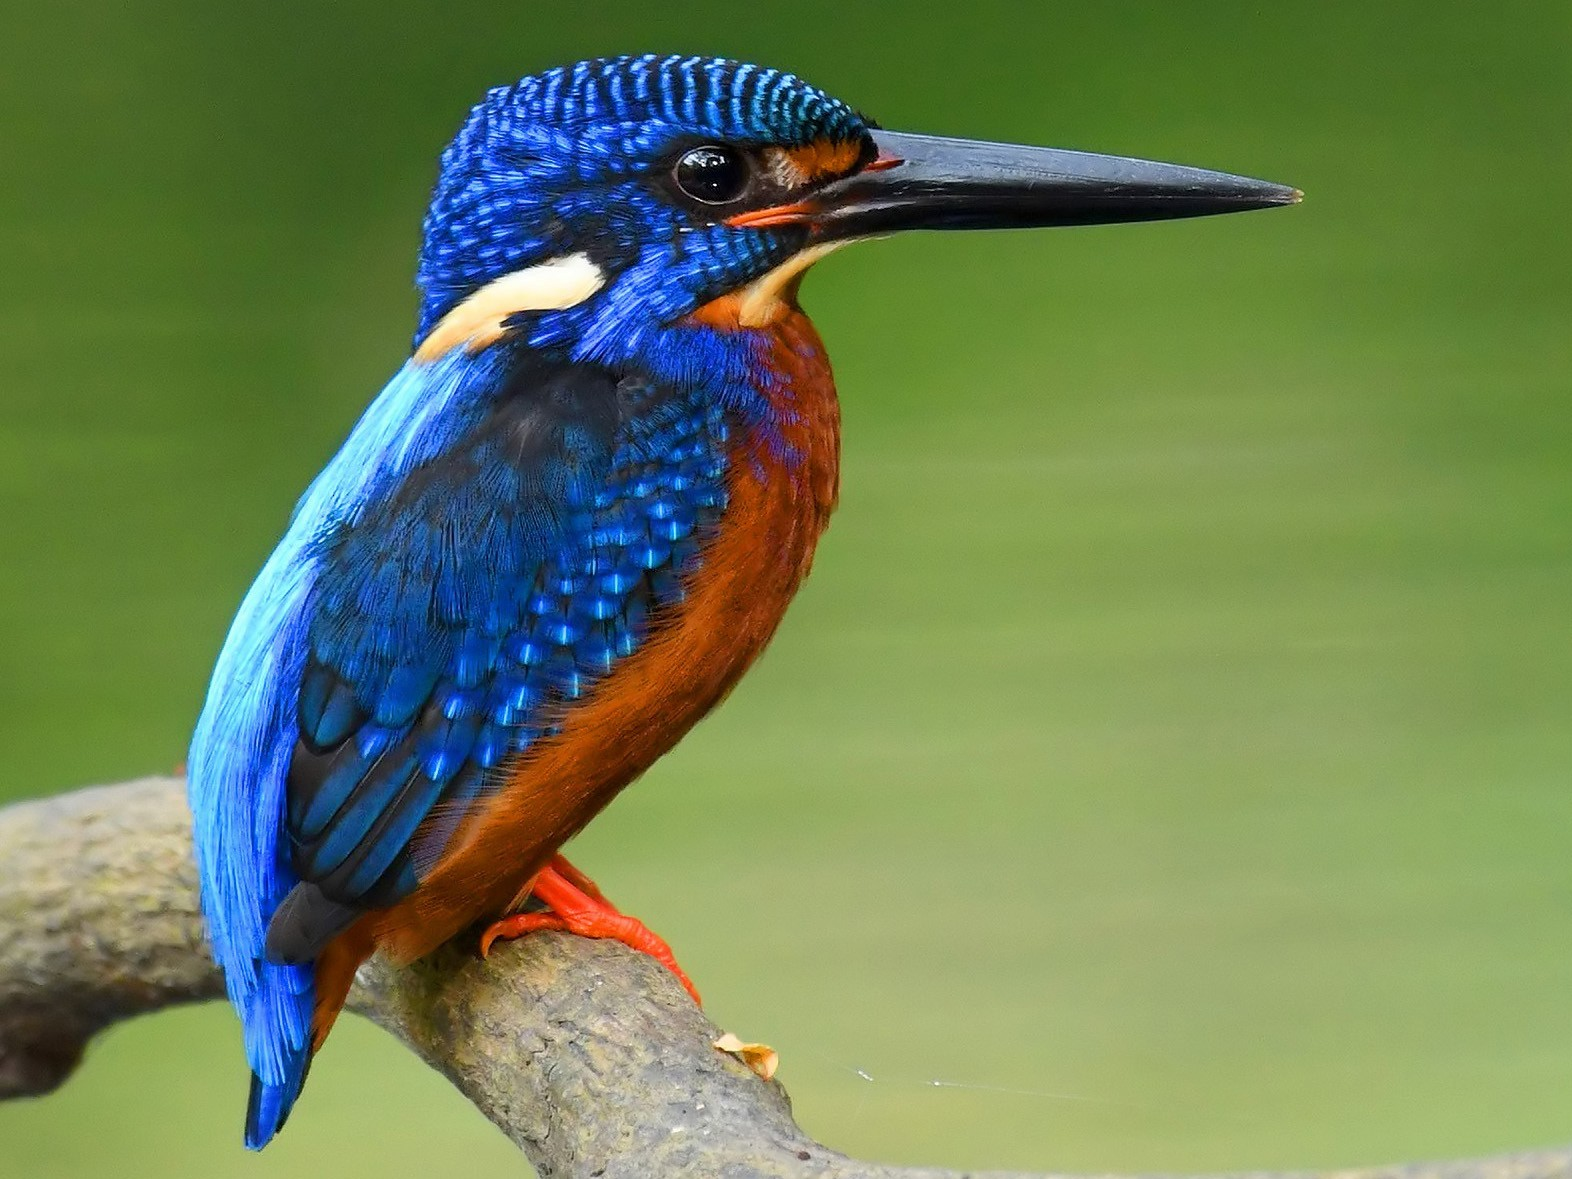

In [129]:
img2

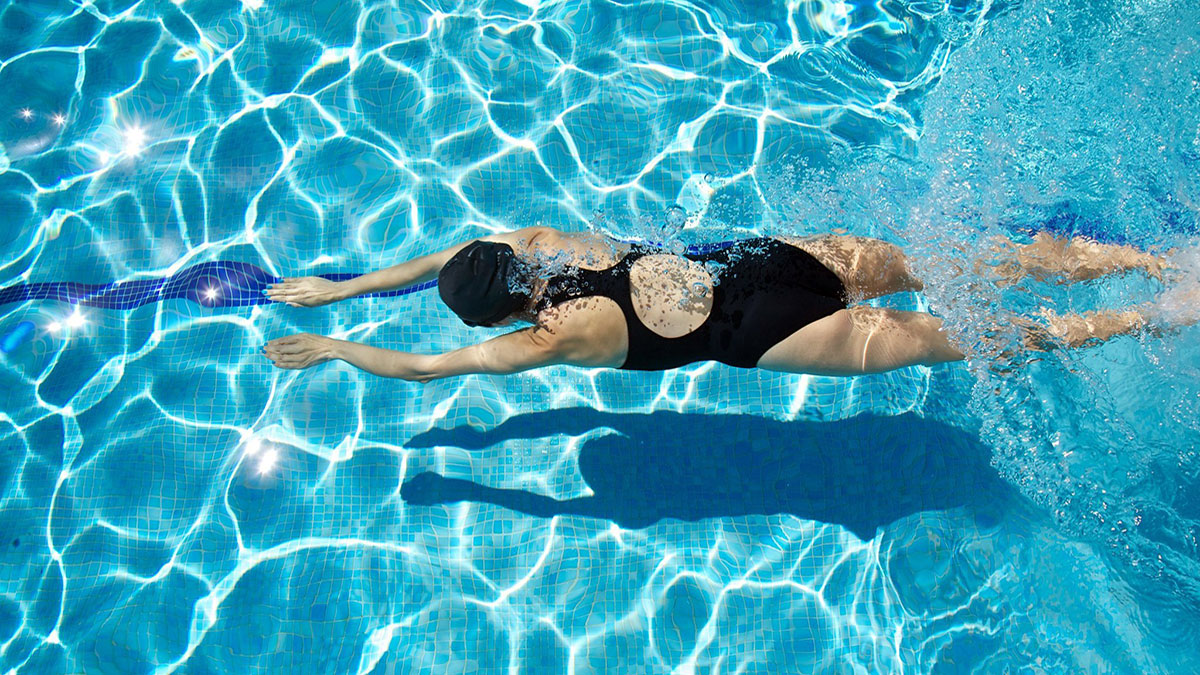

In [130]:
img3

In [131]:
img1 = preprocess(img1)
img2 = preprocess(img2)
img3 = preprocess(img3)

In [132]:
img1.shape

torch.Size([3, 224, 224])

In [133]:
img1 = torch.unsqueeze(img1, 0)
img2 = torch.unsqueeze(img2, 0)
img3 = torch.unsqueeze(img3, 0)

In [134]:
img1.shape

torch.Size([1, 3, 224, 224])

In [135]:
resnet18_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [136]:
probs1 = resnet18_model(img1)
probs2 = resnet18_model(img2)
probs3 = resnet18_model(img3)

In [137]:
probs1.shape

torch.Size([1, 1000])

In [138]:
val1, idx1 = torch.max(probs1, 1)
val2 ,idx2 = torch.max(probs2, 1)
val3, idx3 = torch.max(probs3, 1)

In [142]:
idx1.item()

737

In [143]:
import json

In [145]:
with open('../imagenet_class_index.json') as json_file:
    labels = json.load(json_file)

In [151]:
len(labels)

1000

In [153]:
list(labels.keys())[:5]

['0', '1', '2', '3', '4']

In [154]:
list(labels.values())[:5]

[['n01440764', 'tench'],
 ['n01443537', 'goldfish'],
 ['n01484850', 'great_white_shark'],
 ['n01491361', 'tiger_shark'],
 ['n01494475', 'hammerhead']]

In [159]:
labels[str(idx1.item())]

['n03983396', 'pop_bottle']

In [160]:
labels[str(idx2.item())]

['n01843065', 'jacamar']

In [161]:
labels[str(idx3.item())]

['n04251144', 'snorkel']

In [182]:
top5_1 = torch.topk(probs1, 5)
top5_2 = torch.topk(probs2, 5)
top5_3 = torch.topk(probs3, 5)

In [180]:
top5_1.indices.squeeze().numpy()

array([737, 440, 455, 441, 898], dtype=int64)

In [181]:
for idx in top5_1.indices.squeeze().numpy():
    print(labels[str(idx.item())])

['n03983396', 'pop_bottle']
['n02823428', 'beer_bottle']
['n02877765', 'bottlecap']
['n02823750', 'beer_glass']
['n04557648', 'water_bottle']


In [183]:
for idx in top5_2.indices.squeeze().numpy():
    print(labels[str(idx.item())])

for idx in top5_3.indices.squeeze().numpy():
    print(labels[str(idx.item())])

['n01843065', 'jacamar']
['n01828970', 'bee_eater']
['n01537544', 'indigo_bunting']
['n01818515', 'macaw']
['n01580077', 'jay']
['n04251144', 'snorkel']
['n04371430', 'swimming_trunks']
['n02807133', 'bathing_cap']
['n03710721', 'maillot']
['n02837789', 'bikini']
